In [1]:
!pip install geojson

  Using cached https://files.pythonhosted.org/packages/f1/34/bc3a65faabce27a7faa755ab08d811207a4fc438f77ef09c229fc022d778/geojson-2.4.1-py2.py3-none-any.whl


In [2]:
!pip install pygeoj

In [3]:
!pip install scikit-optimize

  Using cached https://files.pythonhosted.org/packages/f4/44/60f82c97d1caa98752c7da2c1681cab5c7a390a0fdd3a55fac672b321cac/scikit_optimize-0.5.2-py2.py3-none-any.whl


In [4]:
!pip install eli5

  Using cached https://files.pythonhosted.org/packages/ee/2b/246db9e1c2d6f38e999daf0c4d5e54f36fbd0b937ffb13a34d32c2139403/eli5-0.8.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4a/bd/eee1157fc2d8514970b345d69cb9975dcd1e42cd7e61146ed841f6e68309/typing-3.6.6-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1f/e2/ef2581b5b86625657afd32030f90cf2717456c1d2b711ba074bf007c0f1a/graphviz-0.10.1-py2.py3-none-any.whl


In [6]:
!pip install geopy

    100% |################################| 102kB 67kB/s ta 0:00:01
  Running setup.py bdist_wheel for geographiclib ... done
  Stored in directory: /u1/sjameled/.cache/pip/wheels/99/45/d1/14954797e2a976083182c2e7da9b4e924509e59b6e5c661061
Successfully built geographiclib


In [7]:
from blkdbi.dataobject import DataObject, DBMS
import numpy as np
from numpy import seterr,isneginf,array
import pandas as pd
import json
import geojson
import gzip
import math
import string
from datetime import date, timedelta
import sqlanydb
import  nltk

import datetime
import scipy.stats as stats
import itertools
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pylab 
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import Imputer
from dateutil import parser
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from skopt.space import Real
from geopy.distance import vincenty
import warnings
warnings.filterwarnings("ignore")

In [8]:
import eli5
from eli5.sklearn import PermutationImportance

In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /u1/sjameled/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
neighborhood=pd.read_csv('neighbourhoods_s.csv')

In [11]:
neighborhood.head()

,neighbourhood_group,neighbourhood
0,Ballard,Adams
1,Ballard,Loyal Heights
2,Ballard,Sunset Hill
3,Ballard,West Woodland
4,Ballard,Whittier Heights


In [12]:
reviews=pd.read_csv('reviews_s.csv')

In [13]:
reviews.head()

,listing_id,date
0,2318,2008-09-15
1,2318,2017-01-10
2,2318,2017-04-01
3,2318,2017-04-25
4,2318,2017-06-18


In [14]:
listings=pd.read_csv('listings_s.csv')

In [15]:
# listings.sort_values('minimum_nights',ascending=False).head(100)

# Data Exploration

In [16]:
listings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,"8,459.00","17,535,226.58","8,764,311.06","2,318.00","10,783,027.50","18,929,823.00","24,371,436.00","32,243,585.00"
host_id,"8,459.00","49,109,987.57","57,318,849.46",20.00,"7,902,142.00","26,189,599.00","70,299,725.00","241,584,087.00"
latitude,"8,459.00",47.63,0.05,47.50,47.61,47.62,47.66,47.73
longitude,"8,459.00",-122.33,0.03,-122.42,-122.35,-122.33,-122.31,-122.23
price,"8,459.00",156.24,168.73,0.00,79.00,113.00,179.00,"5,400.00"
minimum_nights,"8,459.00",3.62,12.88,1.00,1.00,2.00,2.00,400.00
number_of_reviews,"8,459.00",44.85,65.55,0.00,3.00,18.00,59.00,698.00
reviews_per_month,"7,505.00",2.25,2.17,0.01,0.51,1.54,3.43,14.47
calculated_host_listings_count,"8,459.00",21.33,59.64,1.00,1.00,1.00,4.00,295.00
availability_365,"8,459.00",130.64,125.66,0.00,10.00,87.00,238.00,365.00


In [17]:
#checking missing data
count_missing=100*listings.isnull().sum()/listings.isnull().count() # converting to %
count_missing.sort_values(ascending=False)

reviews_per_month                11.28
last_review                      11.28
availability_365                  0.00
calculated_host_listings_count    0.00
number_of_reviews                 0.00
minimum_nights                    0.00
price                             0.00
room_type                         0.00
longitude                         0.00
latitude                          0.00
neighbourhood                     0.00
neighbourhood_group               0.00
host_name                         0.00
host_id                           0.00
name                              0.00
id                                0.00
dtype: float64

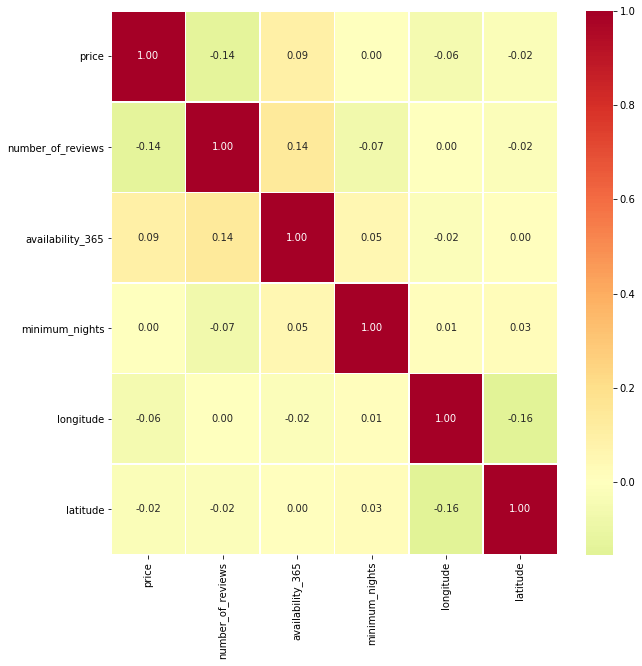

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(listings[['price','number_of_reviews','availability_365','minimum_nights',
                     'room_type','longitude','latitude']].corr(),
            center=0, annot=True, fmt='.2f', linewidths=.5,cmap = plt.cm.RdYlGn_r);

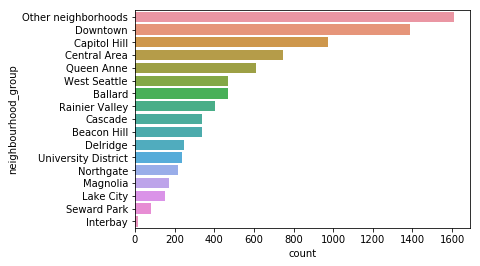

In [19]:
sns.countplot(y='neighbourhood_group',data=listings,order = listings['neighbourhood_group'].value_counts().index);

In [119]:
listings.groupby('room_type')['id'].nunique()/listings['id'].nunique()

room_type
Entire home/apt   0.75
Private room      0.23
Shared room       0.02
Name: id, dtype: float64

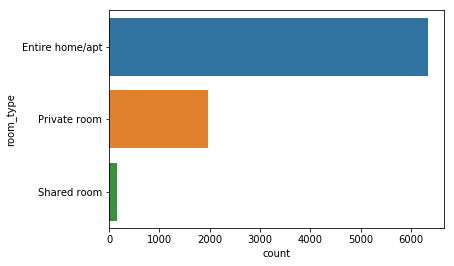

In [20]:
sns.countplot(y='room_type',data=listings,order = listings['room_type'].value_counts().index);
#most listing are for entire homes and apts

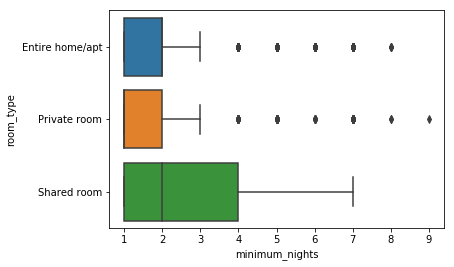

In [21]:
sns.boxplot(x='minimum_nights', y='room_type', data=listings[listings['minimum_nights']<10])
#the rents are mainly short stays

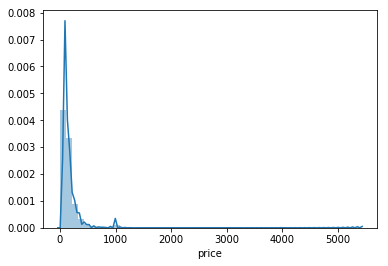

In [22]:
sns.distplot(listings['price']);

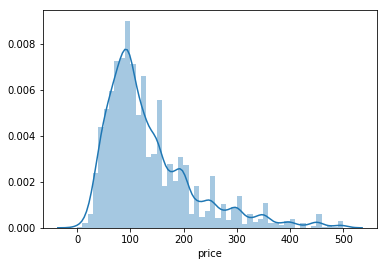

In [122]:
sns.distplot(listings[listings['price']<500]['price']);

In [24]:
listings[listings['price']>5000].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7213,27372338,Convenient location--Special for Jan Long term,54702774,Deanna,Central Area,Harrison/Denny-Blaine,47.62,-122.29,Entire home/apt,5400,7,0,NaN,nan,1,168


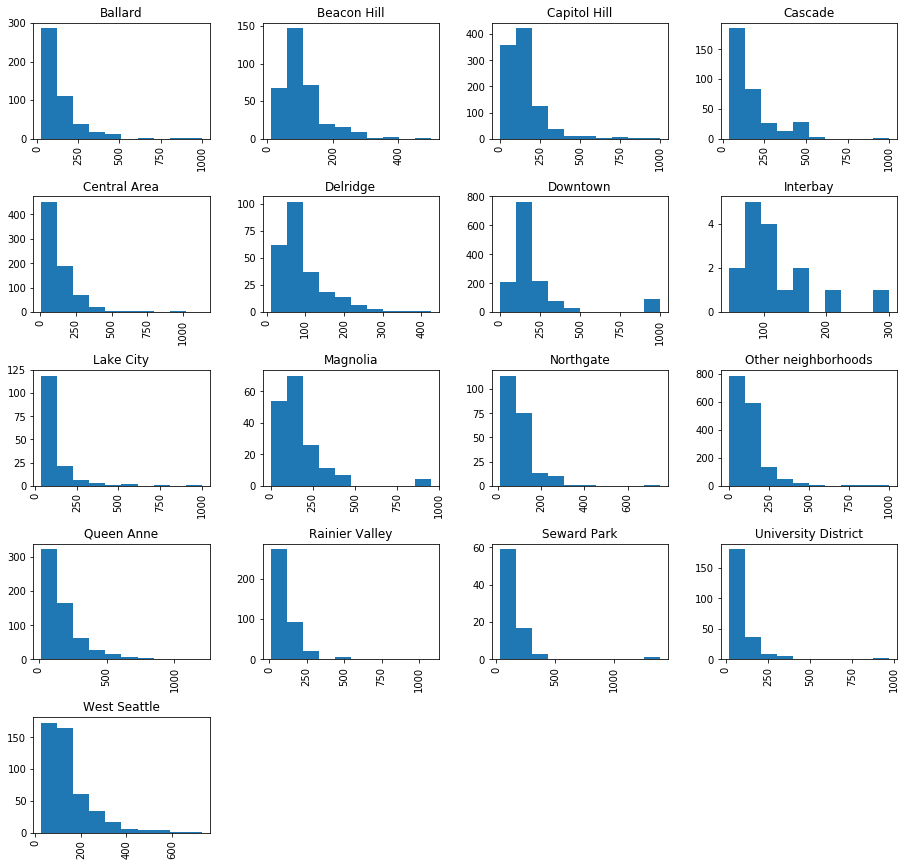

In [60]:
listings[listings['price']<1500]['price'].hist(by=listings['neighbourhood_group'],figsize=(15,15));

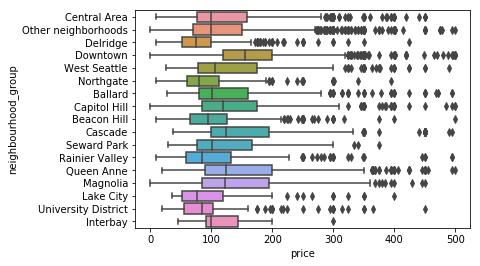

In [123]:
sns.boxplot(x='price', y='neighbourhood_group', data=listings[listings['price']<500]);

In [64]:
listings.groupby('neighbourhood_group')['price'].median().sort_values(ascending=False)

neighbourhood_group
Downtown              168.00
Queen Anne            130.00
Magnolia              125.00
Cascade               125.00
Capitol Hill          120.00
West Seattle          109.00
Ballard               105.00
Seward Park           103.00
Other neighborhoods   100.00
Central Area          100.00
Interbay               99.50
Beacon Hill            94.50
University District    85.00
Rainier Valley         85.00
Northgate              80.00
Lake City              78.00
Delridge               75.00
Name: price, dtype: float64

In [74]:
listings.groupby(['neighbourhood_group','neighbourhood'])['price'].median().sort_values(ascending=False)

neighbourhood_group  neighbourhood            
Downtown             Central Business District   199.00
                     Pike-Market                 199.00
                     International District      195.00
Other neighborhoods  Industrial District         180.00
Magnolia             Briarcliff                  170.50
Downtown             First Hill                  160.00
                     Pioneer Square              160.00
Queen Anne           West Queen Anne             156.00
Capitol Hill         Portage Bay                 155.00
Cascade              South Lake Union            153.00
Downtown             Belltown                    150.00
Beacon Hill          Holly Park                  144.00
Ballard              Sunset Hill                 141.50
Capitol Hill         Madison Park                140.00
Queen Anne           East Queen Anne             130.00
                     North Queen Anne            125.00
Magnolia             Southeast Magnolia          125.00
C

In [65]:
listings.groupby('room_type')['price'].median().sort_values(ascending=False)

room_type
Entire home/apt    135
Private room        65
Shared room         44
Name: price, dtype: int64

# Data wrangling

In [25]:
with open('neighbourhoods_s.geojson') as f:
    data = json.load(f)

for feature in data['features']:
    print(feature['geometry']['type'])
    print(feature['geometry']['coordinates'])

MultiPolygon
[[[[-122.347308, 47.665005], [-122.34645, 47.664997], [-122.34623, 47.665003], [-122.346159, 47.665004], [-122.346125, 47.665011], [-122.346093, 47.665024], [-122.346068, 47.665041], [-122.345092, 47.665011], [-122.34452, 47.664998], [-122.343219, 47.665011], [-122.342698, 47.665023], [-122.340449, 47.665043], [-122.340203, 47.665038], [-122.3401, 47.66573], [-122.340088, 47.666406], [-122.340087, 47.667087], [-122.340082, 47.667914], [-122.340077, 47.668449], [-122.340075, 47.668474], [-122.340073, 47.6685], [-122.34007, 47.668526], [-122.340066, 47.668551], [-122.340063, 47.668577], [-122.34006, 47.668602], [-122.340056, 47.668628], [-122.340052, 47.668654], [-122.340047, 47.668679], [-122.340042, 47.668705], [-122.340038, 47.66873], [-122.340032, 47.668756], [-122.340026, 47.668781], [-122.340022, 47.669199], [-122.340019, 47.669395], [-122.340018, 47.669439], [-122.340017, 47.66947], [-122.340013, 47.669747], [-122.340011, 47.669896], [-122.340009, 47.670204], [-122.33

In [26]:
feature['geometry']['coordinates']

[[[[-122.360803, 47.666908],
   [-122.360744, 47.666817],
   [-122.360375, 47.666206],
   [-122.360257, 47.66601],
   [-122.359831, 47.665295],
   [-122.359643, 47.665046],
   [-122.359501, 47.664894],
   [-122.359051, 47.664492],
   [-122.358268, 47.663799],
   [-122.357704, 47.663306],
   [-122.357378, 47.663058],
   [-122.357014, 47.662834],
   [-122.356569, 47.662588],
   [-122.356477, 47.662538],
   [-122.356312, 47.662437],
   [-122.3562, 47.662384],
   [-122.356113, 47.662342],
   [-122.355865, 47.662258],
   [-122.355573, 47.662181],
   [-122.355438, 47.662141],
   [-122.355437, 47.662207],
   [-122.355428, 47.662527],
   [-122.355424, 47.663009],
   [-122.355425, 47.663661],
   [-122.355417, 47.66436],
   [-122.355414, 47.665032],
   [-122.355057, 47.665027],
   [-122.354365, 47.665019],
   [-122.35345, 47.665019],
   [-122.352496, 47.665019],
   [-122.351421, 47.665014],
   [-122.350304, 47.665039],
   [-122.349989, 47.665033],
   [-122.349793, 47.664992],
   [-122.348868, 47

In [27]:
calendar= pd.read_csv('calendar_s.csv.gz', compression='gzip')

In [28]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,493591,2019-02-09,f,$53.00,$53.00,2,180
1,493591,2019-02-10,f,$53.00,$53.00,2,180
2,493591,2019-02-11,t,$53.00,$53.00,2,180
3,493591,2019-02-12,t,$53.00,$53.00,2,180
4,493591,2019-02-13,t,$53.00,$53.00,2,180


In [29]:
lists= pd.read_csv('listings_s.csv.gz', compression='gzip')
lists.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20190209052057,2019-02-09,Casa Madrona -Urban Oasis! *Discount all of Feb*!,"Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, (Phone number h...",none,Madrona is a hidden gem of a neighborhood. It ...,"We adhere to a 10pm -9am quiet hour schedule, ...",NaN,Guests can access any part of the house.,We are a family who live next door and are ava...,four day minimum stay,nan,nan,https://a0.muscache.com/im/pictures/ac08892c-f...,nan,2536,https://www.airbnb.com/users/show/2536,Megan,2008-08-26,"Seattle, Washington, United States",I welcome guests from all walks of life and ev...,within an hour,100%,nan,t,https://a0.muscache.com/im/pictures/user/55737...,https://a0.muscache.com/im/pictures/user/55737...,Minor,1,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Seattle, WA, United States",Madrona,Madrona,Central Area,Seattle,WA,"98,122.00",Seattle,"Seattle, WA",US,United States,47.61,-122.29,t,House,Entire home/apt,8,2.50,4,4.00,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",nan,$296.00,NaN,NaN,$500.00,$250.00,8,$25.00,7,300,7,7,300,300,7.00,300.00,yesterday,t,28,39,69,343,2019-02-09,21,10,2008-09-15,2018-11-24,100.00,10.00,10.00,10.00,10.00,10.00,10.00,f,NaN,{WASHINGTON},f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.17
1,4291,https://www.airbnb.com/rooms/4291,20190209052057,2019-02-09,Sunrise in Seattle Master Suite,This property is located in the lovely Maple L...,"Located in Seattle, this is a spacious, clean ...",This property is located in the lovely Maple L...,none,NaN,NaN,NaN,NaN,"We do not live on the property, however we do ...",We ask that you please use nearby street parki...,nan,nan,https://a0.muscache.com/im/pictures/19407574/6...,nan,35749,https://www.airbnb.com/users/show/35749,Jess & Joey,2009-09-02,"Seattle, Washington, United States",We're a former Seattle couple who just couldn'...,within an hour,100%,nan,f,https://a0.muscache.com/im/pictures/user/a3c77...,https://a0.muscache.com/im/pictures/user/a3c77...,Roosevelt,5,5,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Seattle, WA, United States",Roosevelt,Roosevelt,Other neighborhoods,Seattle,WA,"98,115.00",S

In [30]:
lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8459 entries, 0 to 8458
Columns: 106 entries, id to reviews_per_month
dtypes: float64(20), int64(24), object(62)
memory usage: 6.8+ MB


In [31]:
#remove the dollar signs
def remove_dol(df,col):
    df[col]=df[col].astype(str).str.replace('$', '').str.replace(',', '')
    df[col]=df[col].astype(float)
    #df[col]=df[col].apply(lambda x: x.strip('$')).astype(float)
    return df

In [32]:
for col in lists[['price','security_deposit','cleaning_fee','extra_people']]:
    remove_dol(lists,col)

In [33]:
#remove the % sign
lists['host_response_rate']=lists['host_response_rate'].str.replace('%', '').astype(float)

In [34]:
perc_nan=lists.isna().mean().round(4) * 100

In [35]:
perc_nan.sort_values(ascending=False)

thumbnail_url                                  100.00
host_acceptance_rate                           100.00
xl_picture_url                                 100.00
medium_url                                     100.00
license                                         99.95
square_feet                                     95.98
monthly_price                                   89.61
weekly_price                                    86.52
notes                                           40.97
access                                          28.87
transit                                         28.35
neighborhood_overview                           28.22
interaction                                     27.40
host_about                                      25.17
house_rules                                     24.34
host_response_rate                              23.10
host_response_time                              23.10
security_deposit                                21.42
space                       

In [36]:
#dropping features with high percentage missing data
lists=lists.drop(['thumbnail_url','host_acceptance_rate','xl_picture_url','medium_url',
                 'license','square_feet','monthly_price','weekly_price','notes','host_total_listings_count',
                  'is_business_travel_ready'],axis=1)

In [37]:
#filling NaN with medians for numerical columns
for col in lists.select_dtypes(include=['float64','int64']):
    lists[col]=lists[col].fillna(lists[col].median())
    

In [38]:
from functools import partial
lists.apply(partial(pd.to_numeric, errors='ignore'))

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20190209052057,2019-02-09,Casa Madrona -Urban Oasis! *Discount all of Feb*!,"Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, (Phone number h...",none,Madrona is a hidden gem of a neighborhood. It ...,NaN,Guests can access any part of the house.,We are a family who live next door and are ava...,four day minimum stay,https://a0.muscache.com/im/pictures/ac08892c-f...,2536,https://www.airbnb.com/users/show/2536,Megan,2008-08-26,"Seattle, Washington, United States",I welcome guests from all walks of life and ev...,within an hour,100.00,t,https://a0.muscache.com/im/pictures/user/55737...,https://a0.muscache.com/im/pictures/user/55737...,Minor,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Seattle, WA, United States",Madrona,Madrona,Central Area,Seattle,WA,"98,122.00",Seattle,"Seattle, WA",US,United States,47.61,-122.29,t,House,Entire home/apt,8,2.50,4,4.00,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",296.00,500.00,250.00,8,25.00,7,300,7,7,300,300,7.00,300.00,yesterday,t,28,39,69,343,2019-02-09,21,10,2008-09-15,2018-11-24,100.00,10.00,10.00,10.00,10.00,10.00,10.00,f,{WASHINGTON},f,strict_14_with_grace_period,f,f,1,1,0,0,0.17
1,4291,https://www.airbnb.com/rooms/4291,20190209052057,2019-02-09,Sunrise in Seattle Master Suite,This property is located in the lovely Maple L...,"Located in Seattle, this is a spacious, clean ...",This property is located in the lovely Maple L...,none,NaN,NaN,NaN,"We do not live on the property, however we do ...",We ask that you please use nearby street parki...,https://a0.muscache.com/im/pictures/19407574/6...,35749,https://www.airbnb.com/users/show/35749,Jess & Joey,2009-09-02,"Seattle, Washington, United States",We're a former Seattle couple who just couldn'...,within an hour,100.00,f,https://a0.muscache.com/im/pictures/user/a3c77...,https://a0.muscache.com/im/pictures/user/a3c77...,Roosevelt,5,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Seattle, WA, United States",Roosevelt,Roosevelt,Other neighborhoods,Seattle,WA,"98,115.00",Seattle,"Seattle, WA",US,United States,47.69,-122.31,t,House,Private room,2,1.00,1,1.00,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Free parking on ...",82.00,200.00,30.00,1,0.00,2,60,2,2,60,60,2.00,60.00,5 days ago,t,30,60,90,365,2019-02-09,63,9,2013-07-01,2018-10-06,91.00,9.

In [39]:
#count the number of amenities
lists['ameneties_count']=(lists['amenities'].str.count(','))+1

In [40]:
lists[['ameneties_count','amenities']].sort_values('ameneties_count',ascending=False).head()

,ameneties_count,amenities
5781,98,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p..."
5775,84,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen..."
979,83,"{TV,Internet,Wifi,Kitchen,""Free parking on pre..."
3415,80,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."
643,76,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."


In [41]:
lists.drop(['amenities'], axis=1, inplace=True)

In [42]:
lists.groupby('ameneties_count')['id'].count()

ameneties_count
1      14
2       6
3       3
5       9
6      14
7      25
8      47
9      59
10     82
11    113
12    144
13    167
14    196
15    235
16    263
17    321
18    331
19    341
20    326
21    373
22    289
23    309
24    338
25    333
26    274
27    301
28    247
29    220
30    196
31    195
     ... 
49     43
50     39
51     29
52     37
53     27
54     22
55     24
56     14
57     19
58     17
59     12
60     13
61     11
62      8
63      7
64      7
65      5
66      2
67      8
68      1
69      1
70      3
71      2
74      2
75      1
76      2
80      1
83      1
84      1
98      1
Name: id, Length: 77, dtype: int64

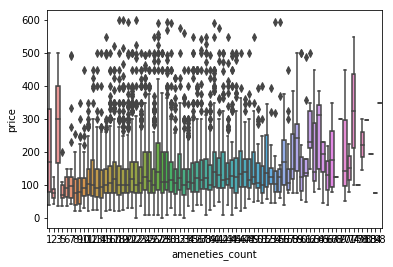

In [43]:
sns.boxplot(y='price', x='ameneties_count', data=lists[lists['price']<600]);

In [44]:
lists.groupby('host_response_time')['id'].count()
#most hosts are super proactive

host_response_time
a few days or more      57
within a day           338
within a few hours     696
within an hour        5414
Name: id, dtype: int64

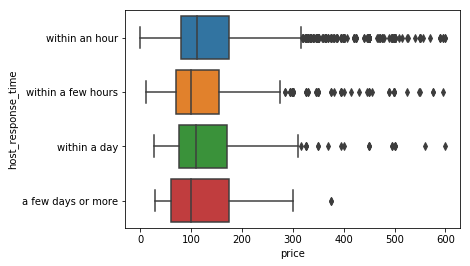

In [45]:
sns.boxplot(x='price', y='host_response_time', data=lists[lists['price']<600]);

In [46]:
lists.groupby('bed_type')['id'].count()

bed_type
Airbed             26
Couch               6
Futon              67
Pull-out Sofa      36
Real Bed         8324
Name: id, dtype: int64

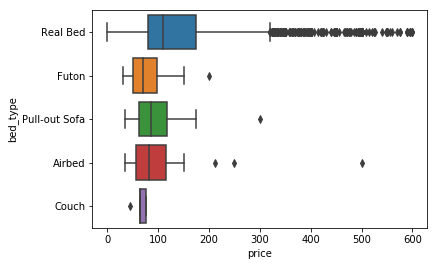

In [47]:
sns.boxplot(x='price', y='bed_type', data=lists[lists['price']<600]);

In [48]:
lists.groupby('cancellation_policy')['id'].count()

cancellation_policy
flexible                       2012
moderate                       3096
strict                          310
strict_14_with_grace_period    2910
super_strict_30                 118
super_strict_60                  13
Name: id, dtype: int64

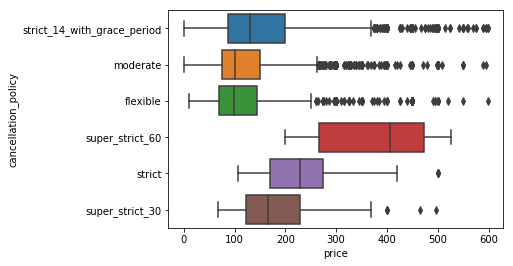

In [49]:
sns.boxplot(x='price', y='cancellation_policy', data=lists[lists['price']<600]);

In [50]:
lists.groupby('property_type')['id'].count()

property_type
Aparthotel              40
Apartment             2811
Bed and breakfast       20
Boat                    21
Boutique hotel           3
Bungalow                96
Cabin                   22
Camper/RV               19
Chalet                   1
Condominium            484
Cottage                 42
Farm stay                1
Guest suite            741
Guesthouse             228
Hostel                   7
House                 2839
Houseboat               15
In-law                   1
Loft                   108
Nature lodge             1
Other                   22
Resort                   1
Serviced apartment     178
Tent                     7
Tiny house              20
Townhouse              724
Treehouse                1
Villa                    4
Yurt                     2
Name: id, dtype: int64

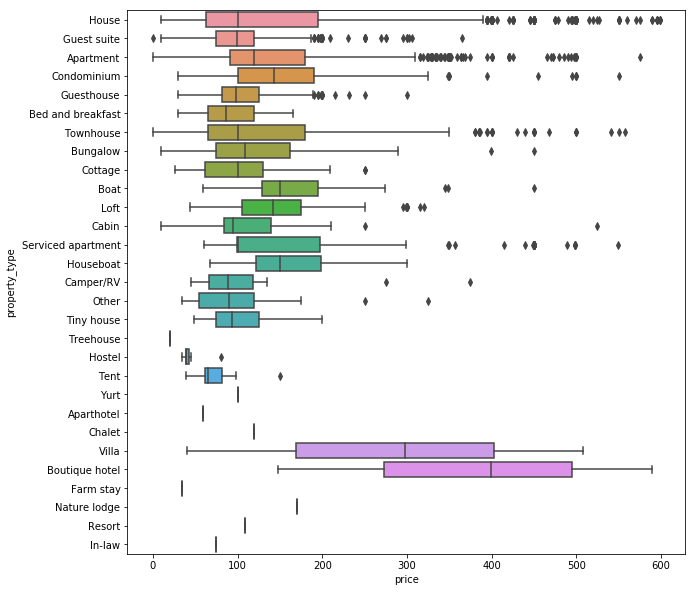

In [51]:
plt.figure(figsize=(10,10))
sns.boxplot(x='price', y='property_type', data=lists[lists['price']<600]);

In [128]:
lists.groupby('host_is_superhost')['id'].count()/lists['id'].count()

host_is_superhost
0   0.59
1   0.41
Name: id, dtype: float64

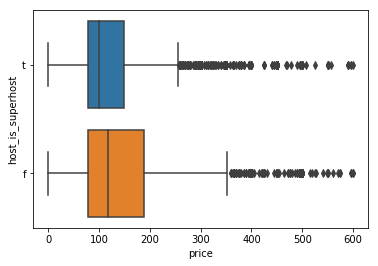

In [53]:
sns.boxplot(x='price', y='host_is_superhost', data=lists[lists['price']<600]);
#doesn't seem like superhost necessarily correlate with higher prices

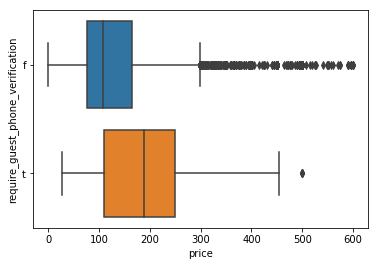

In [54]:
sns.boxplot(x='price', y='require_guest_phone_verification', data=lists[lists['price']<600]);

In [55]:
count_missing=100*lists.isnull().sum()/listings.isnull().count() # converting to %
count_missing.sort_values(ascending=False)

last_review                                    11.28
neighbourhood                                   5.15
room_type                                       0.00
reviews_per_month                               0.00
price                                           0.00
number_of_reviews                               0.00
name                                            0.00
minimum_nights                                  0.00
longitude                                       0.00
latitude                                        0.00
id                                              0.00
host_name                                       0.00
host_id                                         0.00
calculated_host_listings_count                  0.00
availability_365                                0.00
access                                           nan
accommodates                                     nan
ameneties_count                                  nan
availability_30                               

In [56]:
list(lists.select_dtypes(include=['object']))

['listing_url',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'calendar_updated',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'requires_license',
 'jurisdiction_names',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [57]:
boolean_cols = ['host_is_superhost', 
               'host_has_profile_pic',
               'host_identity_verified',
               'is_location_exact',
               'has_availability',
               'requires_license',
               'instant_bookable',
               'require_guest_profile_picture',
               'require_guest_phone_verification']

In [58]:
#tranform boolean features
def booleans_to_numbers(s):  
    if s == 'f':
        return 0
    elif s == 't':
        return 1
    return None

In [59]:
for col in boolean_cols:
    print(col)
    lists[col] = lists[col].apply(booleans_to_numbers)

host_is_superhost
host_has_profile_pic
host_identity_verified
is_location_exact
has_availability
requires_license
instant_bookable
require_guest_profile_picture
require_guest_phone_verification


In [60]:
id_col=[
                   'listing_url', 
                   'scrape_id', 
                   'host_id',
                   'picture_url', 
                   'host_url', 
                   'host_thumbnail_url', 
                   'host_picture_url']
lists.drop(id_col,axis=1,inplace=True)

In [61]:
text_cols = ['name', 'summary',
                        'space',
                        'description',
                        'neighborhood_overview',
                        'transit',
                        'access',
                        'interaction',
                        'host_name',
                        'host_location',
                        'host_about',
                        'host_neighbourhood',
                        'street',
                        'neighbourhood',
                        'neighbourhood_group_cleansed',
                        'state',
                        'zipcode',
                        'market',
                        'smart_location',
                        'city',
                        'country_code',
                        'country', 
                        'calendar_updated', 
                        'calendar_last_scraped', 
                        'first_review',
                        'last_review', 
                        'jurisdiction_names',
                        'experiences_offered']

In [62]:
lists.drop(text_cols , axis=1, inplace=True)

In [63]:
#transform ordinal categories
host_response_dict = {'within an hour': 1, 
                      'within a few hours': 2, 
                      'within a day': 3,
                     'a few days or more': 4}
lists.host_response_time.replace(host_response_dict, inplace=True)

In [64]:
lists.last_scraped.head()

0    2019-02-09
1    2019-02-09
2    2019-02-09
3    2019-02-09
4    2019-02-09
Name: last_scraped, dtype: object

In [65]:
#adding feature to calculate how long the spot has been on airbnb
lists.dropna(subset=['host_since'],how='any',axis=0,inplace=True)
lists['time_length']=lists.last_scraped.apply(lambda s:parser.parse(s))-lists.host_since.apply(lambda s:parser.parse(s))

In [66]:
lists['time_length']=lists.time_length.astype(str).apply(lambda s: int(s.split(' ')[0]))

In [67]:
lists.drop(['host_since'], axis=1, inplace=True)

In [68]:
lists.drop(['last_scraped'], axis=1, inplace=True)

In [69]:
#explore hourse rules a lot of them are about smoking, pets and noise
lists.house_rules

0                                   four day minimum stay
1       We ask that you please use nearby street parki...
2       **PLEASE READ** NO SMOKING NO VAPING NO MARIJU...
3       Please treat the cottage as if it were your ow...
4       No drugs,no smoking inside *outside in front o...
5       Dear Prospective Guest,   There aren’t really ...
6       *The Sweet Orange is a No Smoking house.  The ...
7       *The Tangerine Dream is a Non-Smoking house an...
8       Please treat the apartment as if it were your ...
9       You agree to the following terms and condition...
10      Clean up after yourself in the Kitchen and Bat...
11      We ask that you please use nearby street parki...
12      We ask that you use adjacent street parking, b...
13      no smoking.recycle, do unto others.. treat thi...
14      We ask that you use nearby street parking, but...
15      Consideration for others is the name of the ga...
16      Consideration for others is the name of the ga...
17      While 

In [70]:
#convert the house rules into features
def no_smoking(house_rules_txt):
    is_no_smoking = int('no smoking' in str(house_rules_txt).lower() or 'smoking is not allowed' in str(house_rules_txt).lower()
                       or 'Non-Smoking' in str(house_rules_txt).lower())  

    return is_no_smoking
def no_pet(house_rules_txt):
    is_pet_allowerd= int('no pets' in str(house_rules_txt).lower() or 'no smoking or pets' in str(house_rules_txt).lower())
    return is_pet_allowerd
def no_noise(house_rules_txt):
    is_noise=int('Quiet' in str(house_rules_txt).lower() or 'noise' in str(house_rules_txt).lower() or 
                         'remove shoes' in str(house_rules_txt).lower() )
    return is_noise

In [71]:
lists['house_rules_no_smoking'] = lists.house_rules.apply(no_smoking)
lists['house_rules_no_pets'] = lists.house_rules.apply(no_pet)
lists['house_rules_no_noise'] = lists.house_rules.apply(no_noise)
lists.drop(['house_rules'], axis=1, inplace=True)

In [72]:
lists['host_verification_level'] = lists.host_verifications.apply(lambda s: len(s.split(', ')))
lists.drop(['host_verifications'], axis=1, inplace=True)

In [73]:
#drop duplicates 
dupes=['minimum_minimum_nights',                          
'maximum_minimum_nights',                          
'minimum_maximum_nights',                        
'maximum_maximum_nights',                          
'minimum_nights_avg_ntm',                          
'maximum_nights_avg_ntm']
lists.drop(dupes,axis=1,inplace=True)

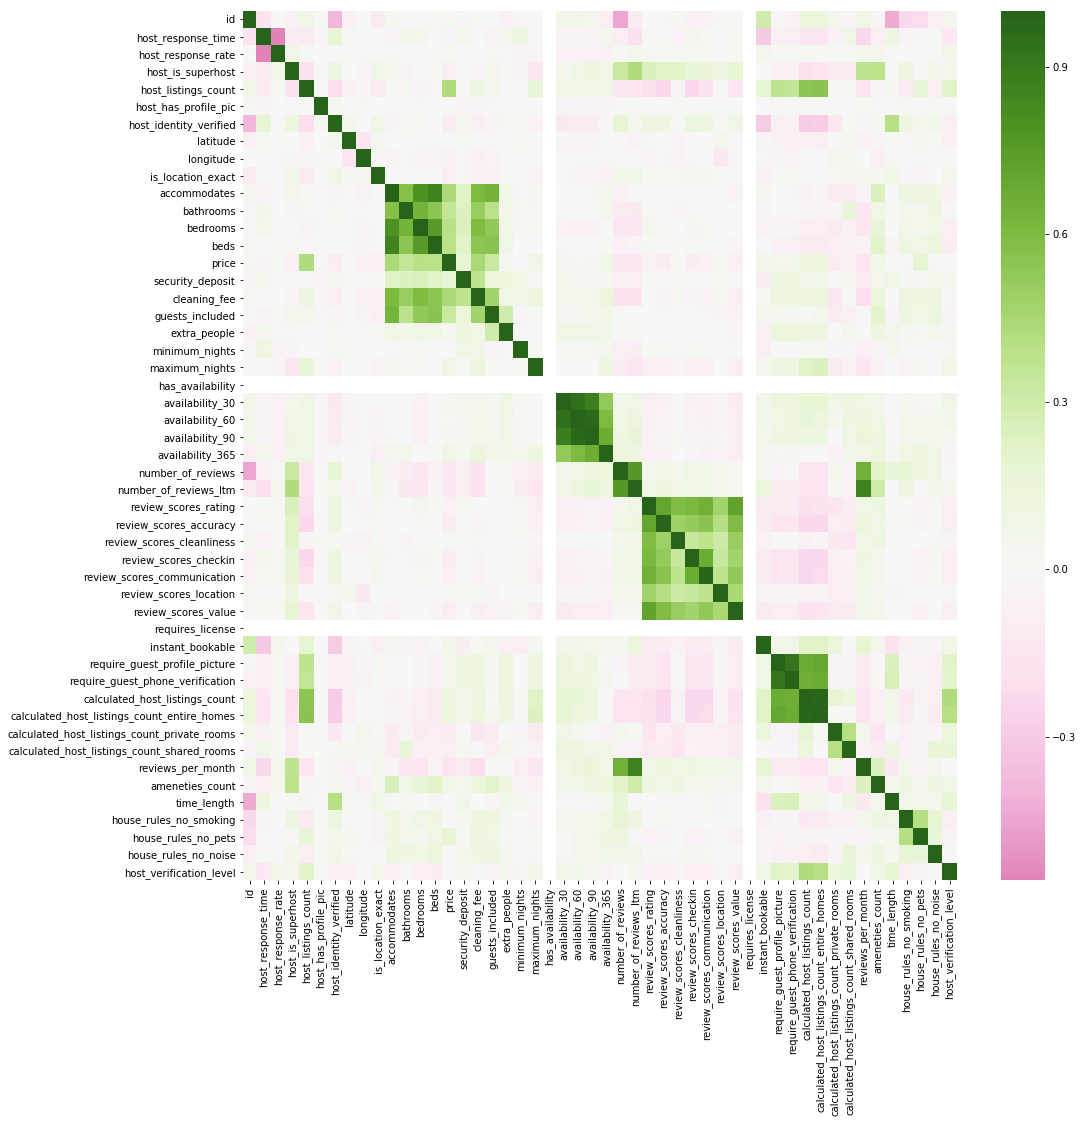

In [74]:
plt.figure(figsize=(16,16))
sns.heatmap(lists.corr(),center=0,cmap="PiYG");
plt.show()

In [75]:
#convert categorial features
lists=pd.get_dummies(lists,columns=['property_type','room_type','bed_type','cancellation_policy','neighbourhood_cleansed'],drop_first=True)

# Utilizing reviews to potentially extract sentiment

In [76]:
reviews_full= pd.read_csv('reviews.csv.gz', compression='gzip')

In [77]:
reviews_full.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an..."
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s..."
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...


In [444]:
reviews_full.dropna(subset=['comments'], how='any', axis=0, inplace=True)

In [445]:
# calculates compound sentiment polarity of the sentence
vader_polarity_compound = lambda s: (SentimentIntensityAnalyzer().polarity_scores(s))['compound']

In [446]:
reviews_full['polarity'] = reviews_full.comments.map(vader_polarity_compound)

In [447]:
#because this process takes a long time i saved the results in a h5 file
reviews_full.to_hdf('reviews_full.h5', key='reviews_full', mode='w')

In [80]:
reviews_full=pd.read_hdf('reviews_full.h5')

In [81]:
reviews_full.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.,0.44
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an...",1.00
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...,0.98
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s...",0.91
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...,0.84


Text(0, 0.5, 'Number of reviews')

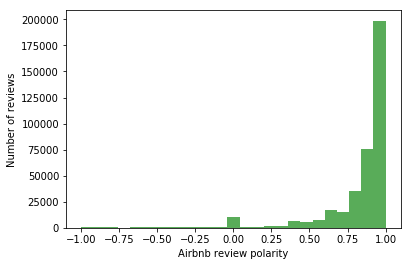

In [82]:
plt.hist(reviews_full.polarity, bins=25, color='g', alpha=0.65)
plt.xlabel('Airbnb review polarity')
plt.ylabel('Number of reviews')
# reviews are mostly positive 

In [83]:
(reviews_full.polarity.values<-0.05).mean()

0.012453034158174364

In [126]:
reviews_full[reviews_full['polarity']<-0.25].head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity
22,4291,5630770,2013-07-08,7306147,Bryant,Greatly enjoyed our quick stay here. We booked...,-0.81
37,4291,18066365,2014-08-21,17924208,Ripple,The room and bathroom were spacious and well-f...,-0.63
56,4291,86023408,2016-07-14,6097532,Kristin,Check-in and out was easy. All my e-mails were...,-0.44
64,4291,96415938,2016-08-22,87039549,Tippaya,beware of the wrong location from air bnb map....,-0.62
464,5682,164515262,2017-06-27,116130793,Theresa,Had basic amenities. Maddy answered our concer...,-0.83


In [85]:
reviews_summary=pd.pivot_table(reviews_full,index='listing_id',values='polarity', aggfunc=np.mean)
reviews_summary=pd.DataFrame(reviews_summary.to_records())
reviews_summary.columns=['id','sentiment']
reviews_summary.head()

,id,sentiment
0,2318,0.92
1,4291,0.73
2,5682,0.86
3,6606,0.85
4,9419,0.90


In [86]:
Master_table=pd.merge(lists,reviews_summary,on='id',how='left')

In [87]:
Master_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8459 entries, 0 to 8458
Columns: 177 entries, id to sentiment
dtypes: float64(19), int64(32), uint8(126)
memory usage: 4.4 MB


In [88]:
#add sentiment to the master table 
Master_table['sentiment']=Master_table['sentiment'].fillna(Master_table['sentiment'].median())

In [89]:
#fill in the missing data with the mean
Master_table[Master_table==np.inf]=np.nan
Master_table.fillna(Master_table.mean(), inplace=True)

# Modeling what are the drivers of price

In [92]:
y=Master_table['price']
X=Master_table.drop(['price','id'],axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [94]:
#Grid search to look for optimal parameters for our Gradient boosting
regr = GradientBoostingRegressor(random_state=42)
param_dist ={"max_depth": stats.randint(2, 6),
              "n_estimators": stats.randint(50, 200),
               "learning_rate": Real(0.01, 1, "log-uniform", name='learning_rate'),
               "subsample": stats.uniform(0.5, 0.5)}

n_iter_search = 50
random_search = RandomizedSearchCV(regr, param_distributions=param_dist,
                                  n_iter=n_iter_search, cv=3, verbose=2)

random_search.fit(X_train, y_train)
print(random_search.best_score_, random_search.best_estimator_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] learning_rate=[0.06656078], max_depth=3, n_estimators=50, subsample=0.983622793057918 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=[0.06656078], max_depth=3, n_estimators=50, subsample=0.983622793057918, total=   0.7s
[CV] learning_rate=[0.06656078], max_depth=3, n_estimators=50, subsample=0.983622793057918 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  learning_rate=[0.06656078], max_depth=3, n_estimators=50, subsample=0.983622793057918, total=   0.7s
[CV] learning_rate=[0.06656078], max_depth=3, n_estimators=50, subsample=0.983622793057918 
[CV]  learning_rate=[0.06656078], max_depth=3, n_estimators=50, subsample=0.983622793057918, total=   0.7s
[CV] learning_rate=[0.06531415], max_depth=2, n_estimators=101, subsample=0.7623720699755403 
[CV]  learning_rate=[0.06531415], max_depth=2, n_estimators=101, subsample=0.7623720699755403, total=   0.9s
[CV] learning_rate=[0.06531415], max_depth=2, n_estimators=101, subsample=0.7623720699755403 
[CV]  learning_rate=[0.06531415], max_depth=2, n_estimators=101, subsample=0.7623720699755403, total=   0.9s
[CV] learning_rate=[0.06531415], max_depth=2, n_estimators=101, subsample=0.7623720699755403 
[CV]  learning_rate=[0.06531415], max_depth=2, n_estimators=101, subsample=0.7623720699755403, total=   0.9s
[CV] learning_rate=[0.8487176], max_depth=3, n_estimators=82, subsample=0.76092958352

[CV]  learning_rate=[0.57911387], max_depth=2, n_estimators=93, subsample=0.8862429783400765, total=   0.7s
[CV] learning_rate=[0.57911387], max_depth=2, n_estimators=93, subsample=0.8862429783400765 
[CV]  learning_rate=[0.57911387], max_depth=2, n_estimators=93, subsample=0.8862429783400765, total=   0.7s
[CV] learning_rate=[0.57911387], max_depth=2, n_estimators=93, subsample=0.8862429783400765 
[CV]  learning_rate=[0.57911387], max_depth=2, n_estimators=93, subsample=0.8862429783400765, total=   0.7s
[CV] learning_rate=[0.01698086], max_depth=5, n_estimators=142, subsample=0.7248328578769061 
[CV]  learning_rate=[0.01698086], max_depth=5, n_estimators=142, subsample=0.7248328578769061, total=   4.6s
[CV] learning_rate=[0.01698086], max_depth=5, n_estimators=142, subsample=0.7248328578769061 
[CV]  learning_rate=[0.01698086], max_depth=5, n_estimators=142, subsample=0.7248328578769061, total=   4.6s
[CV] learning_rate=[0.01698086], max_depth=5, n_estimators=142, subsample=0.72483285

[CV]  learning_rate=[0.79905557], max_depth=2, n_estimators=135, subsample=0.6898968281858537, total=   1.2s
[CV] learning_rate=[0.74294883], max_depth=2, n_estimators=110, subsample=0.5349584885590929 
[CV]  learning_rate=[0.74294883], max_depth=2, n_estimators=110, subsample=0.5349584885590929, total=   1.1s
[CV] learning_rate=[0.74294883], max_depth=2, n_estimators=110, subsample=0.5349584885590929 
[CV]  learning_rate=[0.74294883], max_depth=2, n_estimators=110, subsample=0.5349584885590929, total=   1.1s
[CV] learning_rate=[0.74294883], max_depth=2, n_estimators=110, subsample=0.5349584885590929 
[CV]  learning_rate=[0.74294883], max_depth=2, n_estimators=110, subsample=0.5349584885590929, total=   1.1s
[CV] learning_rate=[0.24344281], max_depth=3, n_estimators=167, subsample=0.5454601395816387 
[CV]  learning_rate=[0.24344281], max_depth=3, n_estimators=167, subsample=0.5454601395816387, total=   2.6s
[CV] learning_rate=[0.24344281], max_depth=3, n_estimators=167, subsample=0.545

[CV]  learning_rate=[0.92100074], max_depth=5, n_estimators=90, subsample=0.8710085257908879, total=   2.8s
[CV] learning_rate=[0.92100074], max_depth=5, n_estimators=90, subsample=0.8710085257908879 
[CV]  learning_rate=[0.92100074], max_depth=5, n_estimators=90, subsample=0.8710085257908879, total=   2.8s
[CV] learning_rate=[0.31870294], max_depth=4, n_estimators=75, subsample=0.951117355555883 
[CV]  learning_rate=[0.31870294], max_depth=4, n_estimators=75, subsample=0.951117355555883, total=   1.6s
[CV] learning_rate=[0.31870294], max_depth=4, n_estimators=75, subsample=0.951117355555883 
[CV]  learning_rate=[0.31870294], max_depth=4, n_estimators=75, subsample=0.951117355555883, total=   1.5s
[CV] learning_rate=[0.31870294], max_depth=4, n_estimators=75, subsample=0.951117355555883 
[CV]  learning_rate=[0.31870294], max_depth=4, n_estimators=75, subsample=0.951117355555883, total=   1.5s
[CV] learning_rate=[0.16485442], max_depth=4, n_estimators=135, subsample=0.7232953101871515 


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  5.2min finished


0.4315014374413081 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=array([0.22148]), loss='ls', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=159,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=0.9976337140605256, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [95]:
regr = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=array([0.22148]), loss='ls', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=159,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=0.9976337140605256, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
regr.fit(X_train, y_train)
print(r2_score(y_val, regr.predict(X_val)))

0.6094174222380072


In [96]:
perm = PermutationImportance(regr, random_state=42).fit(X_val, y_val)
eli5.show_weights(perm, top=X.shape[1], feature_names = X.columns.tolist())

Weight,Feature
0.4956 ± 0.1565,bathrooms
0.4819 ± 0.1518,bedrooms
0.4140 ± 0.0158,host_listings_count
0.0924 ± 0.0446,accommodates
0.0457 ± 0.0179,longitude
0.0412 ± 0.0200,latitude
0.0349 ± 0.0165,beds
0.0345 ± 0.0355,cleaning_fee
0.0302 ± 0.0335,calculated_host_listings_count_entire_homes
0.0210 ± 0.0236,host_verification_level


In [97]:
RF_coeff=pd.DataFrame(regr.feature_importances_,X.columns,columns=['Coeff'])
RF_coeff.sort_values('Coeff',ascending=False)

,Coeff
host_listings_count,0.21
cleaning_fee,0.13
bedrooms,0.10
neighbourhood_cleansed_Harrison/Denny-Blaine,0.08
bathrooms,0.06
accommodates,0.04
minimum_nights,0.04
longitude,0.03
host_verification_level,0.03
latitude,0.03


In [98]:

feature_list = list(X.columns)
# Get numerical feature importances
importances = list(regr.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [99]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: host_listings_count  Importance: 0.21
Variable: cleaning_fee         Importance: 0.13
Variable: bedrooms             Importance: 0.1
Variable: neighbourhood_cleansed_Harrison/Denny-Blaine Importance: 0.08
Variable: bathrooms            Importance: 0.06
Variable: accommodates         Importance: 0.04
Variable: minimum_nights       Importance: 0.04
Variable: latitude             Importance: 0.03
Variable: longitude            Importance: 0.03
Variable: ameneties_count      Importance: 0.03
Variable: host_verification_level Importance: 0.03
Variable: reviews_per_month    Importance: 0.02
Variable: host_response_rate   Importance: 0.01
Variable: is_location_exact    Importance: 0.01
Variable: beds                 Importance: 0.01
Variable: security_deposit     Importance: 0.01
Variable: guests_included      Importance: 0.01
Variable: availability_90      Importance: 0.01
Variable: availability_365     Importance: 0.01
Variable: number_of_reviews    Importance: 0.01
Variable: calc

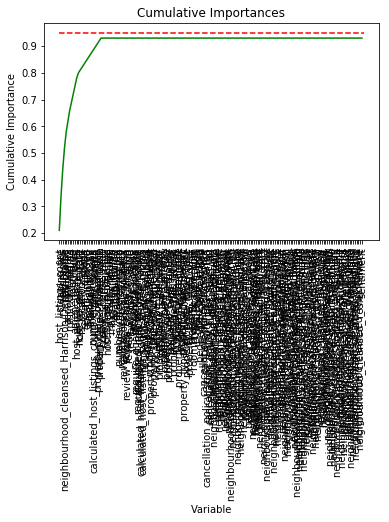

In [103]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(sorted_features, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(sorted_features, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [104]:
print('Number of features for 80% importance:', np.where(cumulative_importances > 0.80)[0][0] + 1)
print('Number of features for 85% importance:', np.where(cumulative_importances > 0.85)[0][0] + 1)
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)

Number of features for 80% importance: 13
Number of features for 85% importance: 17
Number of features for 90% importance: 22


In [105]:
# Extract the names of the most important features- we can see from the cumulative importance there is a plateau beyond 20 features
important_feature_names = [feature[0] for feature in feature_importances[0:20]]

In [106]:
important_feature_names

['host_listings_count',
 'cleaning_fee',
 'bedrooms',
 'neighbourhood_cleansed_Harrison/Denny-Blaine',
 'bathrooms',
 'accommodates',
 'minimum_nights',
 'latitude',
 'longitude',
 'ameneties_count',
 'host_verification_level',
 'reviews_per_month',
 'host_response_rate',
 'is_location_exact',
 'beds',
 'security_deposit',
 'guests_included',
 'availability_90',
 'availability_365',
 'number_of_reviews']

# Analyzing data surprises

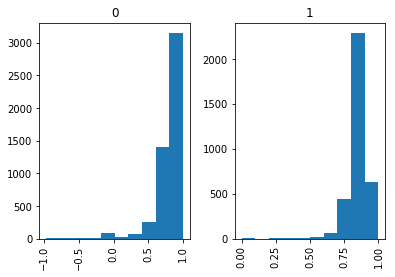

In [111]:
Master_table['sentiment'].hist(by=Master_table['host_is_superhost']);#no negative reviews for superhost

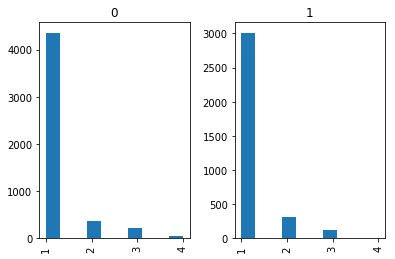

In [113]:
Master_table['host_response_time'].hist(by=Master_table['host_is_superhost']);#similar profile except that superhost never take more than a day to respond

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ed7e6fb00>,
      dtype=object)

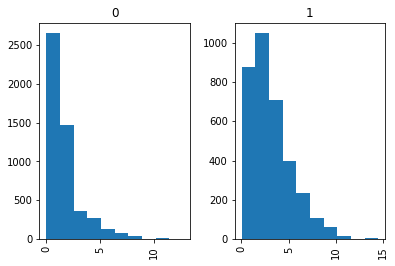

In [117]:
Master_table['reviews_per_month'].hist(by=Master_table['host_is_superhost'])
#my theory is althought being a superhost doesn't necessarily command a premium on price, it will attract more people 
#there will be more traffic and the accomodation will stay less on the market and be rented more often than the others

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ed7491320>,
      dtype=object)

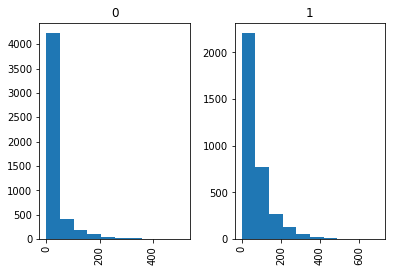

In [129]:
Master_table['number_of_reviews'].hist(by=Master_table['host_is_superhost'])